<a href="https://colab.research.google.com/github/Piramu-Mahalingam/DS-Course-Assignment-1/blob/main/Piramu_M_Mini_Project_Python_Libraries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#1.Get current Working Directory
import os
print(os.getcwd())

/content


# New Section

In [ ]:
#1.Load the student marks and attendance data from the provided Excel files into two separate Pandas DataFrames.
import pandas as pd
smarks = pd.read_excel("./Marks.xlsx")
satt=pd.read_excel("./Attendance.xlsx")
print(smarks)
print(satt)

                  Name Mini Test 1 Mini Test 2 Live Test  Assignment
0                Arjun           9           5        14        16.0
1         Sophia Hardy           8           9        13        19.0
2                  RAj          10          10        15        20.0
3                Emily           9           7        11        16.0
4         Ishaan Saini           8           7        14        11.0
..                 ...         ...         ...       ...         ...
105            Makayla           2           7        13         3.0
106      Ishaan Kapoor           9           6        13        20.0
107            Addison           8           8        12        12.0
108  Aditya Srivastava           5           5         8        17.0
109             Peyton           9           9        12        10.0

[110 rows x 5 columns]
                  Name Attendance Day 1 Attendance Day 2 Attendance Day 3  \
0                Arjun                Y                N               

# New Section

In [ ]:
#2.Merge the two DataFrames on the Name column to create a single DataFrame.
mergedf=pd.merge(smarks,satt,on="Name",how="inner")
print(mergedf)

                  Name Mini Test 1 Mini Test 2 Live Test  Assignment  \
0                Arjun           9           5        14        16.0   
1         Sophia Hardy           8           9        13        19.0   
2                  RAj          10          10        15        20.0   
3                Emily           9           7        11        16.0   
4         Ishaan Saini           8           7        14        11.0   
..                 ...         ...         ...       ...         ...   
105            Makayla           2           7        13         3.0   
106      Ishaan Kapoor           9           6        13        20.0   
107            Addison           8           8        12        12.0   
108  Aditya Srivastava           5           5         8        17.0   
109             Peyton           9           9        12        10.0   

    Attendance Day 1 Attendance Day 2 Attendance Day 3 Attendance Day 4  \
0                  Y                N                N      

In [ ]:
#3.Replace attendance values ('Y' or 'N') with numeric values (1 for 'Y' and 0 for 'N')
attendance_columns = ['Attendance Day 1', 'Attendance Day 2', 'Attendance Day 3', 'Attendance Day 4','Attendance Day 5']
for column in attendance_columns:
  mergedf[column]=mergedf[column].replace({'Y':1,'N':0})
print(mergedf.head())

           Name Mini Test 1 Mini Test 2 Live Test  Assignment  \
0         Arjun           9           5        14        16.0   
1  Sophia Hardy           8           9       113        19.0   
2           RAj          10          10        15        20.0   
3         Emily           9           7        11        16.0   
4  Ishaan Saini           8           7        14        11.0   

   Attendance Day 1  Attendance Day 2  Attendance Day 3  Attendance Day 4  \
0                 1                 0                 0                 0   
1                 1                 0                 0                 1   
2                 1                 1                 1                 1   
3                 1                 1                 0                 1   
4                 0                 0                 0                 0   

   Attendance Day 5  
0                 1  
1                 1  
2                 1  
3                 1  
4                 1  


<ipython-input-6-0b1fa4a55970>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  mergedf[column]=mergedf[column].replace({'Y':1,'N':0})


In [ ]:
#5.Do the column cleaning like name column is the combination of upper and lower case.
mergedf['Name'] = mergedf['Name'].str.title()
print(mergedf.head())

           Name Mini Test 1 Mini Test 2 Live Test  Assignment  \
0         Arjun           9           5        14        16.0   
1  Sophia Hardy           8           9        13        19.0   
2           Raj          10          10        15        20.0   
3         Emily           9           7        11        16.0   
4  Ishaan Saini           8           7        14        11.0   

  Attendance Day 1 Attendance Day 2 Attendance Day 3 Attendance Day 4  \
0                Y                N                N                N   
1                Y                N                N                Y   
2                Y                Y                Y                Y   
3                Y                Y                N                Y   
4                N                N                N                N   

  Attendance Day 5  
0                Y  
1                Y  
2                Y  
3                Y  
4                Y  


In [ ]:
#4.Deal with the missing values.
print(mergedf.isnull().sum())
mergedf=mergedf.fillna(0)
print(mergedf.isnull().sum())
mergedf.head()

Name                0
Mini Test 1         1
Mini Test 2         1
Live Test           1
Assignment          1
Attendance Day 1    0
Attendance Day 2    0
Attendance Day 3    0
Attendance Day 4    0
Attendance Day 5    0
dtype: int64
Name                0
Mini Test 1         0
Mini Test 2         0
Live Test           0
Assignment          0
Attendance Day 1    0
Attendance Day 2    0
Attendance Day 3    0
Attendance Day 4    0
Attendance Day 5    0
dtype: int64


,Name,Mini Test 1,Mini Test 2,Live Test,Assignment,Attendance Day 1,Attendance Day 2,Attendance Day 3,Attendance Day 4,Attendance Day 5
0,Arjun,9,5,14,16.0,Y,N,N,N,Y
1,Sophia Hardy,8,9,13,19.0,Y,N,N,Y,Y
2,Raj,10,10,15,20.0,Y,Y,Y,Y,Y
3,Emily,9,7,11,16.0,Y,Y,N,Y,Y
4,Ishaan Saini,8,7,14,11.0,N,N,N,N,Y


In [ ]:
#6.Total marks for each student.
mergedf[['Mini Test 1', 'Mini Test 2', 'Live Test', 'Assignment']] = mergedf[['Mini Test 1', 'Mini Test 2', 'Live Test', 'Assignment']].apply(pd.to_numeric, errors='coerce')
mergedf['Total Marks'] = mergedf[['Mini Test 1', 'Mini Test 2', 'Live Test', 'Assignment']].sum(axis=1)
mergedf.head()

,Name,Mini Test 1,Mini Test 2,Live Test,Assignment,Attendance Day 1,Attendance Day 2,Attendance Day 3,Attendance Day 4,Attendance Day 5,Total Marks
0,Arjun,9.0,5.0,14.0,16.0,Y,N,N,N,Y,44.0
1,Sophia Hardy,8.0,9.0,13.0,19.0,Y,N,N,Y,Y,49.0
2,Raj,10.0,10.0,15.0,20.0,Y,Y,Y,Y,Y,55.0
3,Emily,9.0,7.0,11.0,16.0,Y,Y,N,Y,Y,43.0
4,Ishaan Saini,8.0,7.0,14.0,11.0,N,N,N,N,Y,40.0


In [ ]:
#7.Percentage marks for each student.
mergedf['Percentage Marks'] = (mergedf['Total Marks'] / 60) * 100  # Assuming max marks per test = 60, total max = 100
mergedf.head()

,Name,Mini Test 1,Mini Test 2,Live Test,Assignment,Attendance Day 1,Attendance Day 2,Attendance Day 3,Attendance Day 4,Attendance Day 5,Total Marks,Percentage Marks
0,Arjun,9.0,5.0,14.0,16.0,Y,N,N,N,Y,44.0,73.333333
1,Sophia Hardy,8.0,9.0,13.0,19.0,Y,N,N,Y,Y,49.0,81.666667
2,Raj,10.0,10.0,15.0,20.0,Y,Y,Y,Y,Y,55.0,91.666667
3,Emily,9.0,7.0,11.0,16.0,Y,Y,N,Y,Y,43.0,71.666667
4,Ishaan Saini,8.0,7.0,14.0,11.0,N,N,N,N,Y,40.0,66.666667


In [ ]:
#8.Attendance percentage for each student based on attendance columns.
def calculate_attendance_percentage(row):
    # Count the number of 'Y' values (attended classes) in the attendance columns
    attended_classes = row[['Attendance Day 1', 'Attendance Day 2', 'Attendance Day 3', 'Attendance Day 4', 'Attendance Day 5']].apply(lambda x: 1 if x == 'Y' else 0).sum()
    total_classes = len(row[['Attendance Day 1', 'Attendance Day 2', 'Attendance Day 3', 'Attendance Day 4', 'Attendance Day 5']])  # Total attendance columns
    return (attended_classes / total_classes) * 100

# Apply the function to each row (axis=1 means apply row-wise)
mergedf['Attendance Percentage'] = mergedf.apply(calculate_attendance_percentage, axis=1)
mergedf.head()


,Name,Mini Test 1,Mini Test 2,Live Test,Assignment,Attendance Day 1,Attendance Day 2,Attendance Day 3,Attendance Day 4,Attendance Day 5,Total Marks,Percentage Marks,Attendance Percentage
0,Arjun,9.0,5.0,14.0,16.0,Y,N,N,N,Y,44.0,73.333333,40.0
1,Sophia Hardy,8.0,9.0,13.0,19.0,Y,N,N,Y,Y,49.0,81.666667,60.0
2,Raj,10.0,10.0,15.0,20.0,Y,Y,Y,Y,Y,55.0,91.666667,100.0
3,Emily,9.0,7.0,11.0,16.0,Y,Y,N,Y,Y,43.0,71.666667,80.0
4,Ishaan Saini,8.0,7.0,14.0,11.0,N,N,N,N,Y,40.0,66.666667,20.0


In [ ]:
#9.Calculate the weighted percentage – Attendance(40%), Mini test01(10%), Mini test02(10%), Live test(20%), Assignment (20%).
mergedf['Weighted Percentage'] = (
    mergedf['Attendance Percentage'] * 0.40 +
    mergedf['Mini Test 1'] * 0.10 +
    mergedf['Mini Test 2'] * 0.10 +
    mergedf['Live Test'] * 0.20 +
    mergedf['Assignment'] * 0.20
)
mergedf.head()

,Name,Mini Test 1,Mini Test 2,Live Test,Assignment,Attendance Day 1,Attendance Day 2,Attendance Day 3,Attendance Day 4,Attendance Day 5,Total Marks,Percentage Marks,Attendance Percentage,Weighted Percentage
0,Arjun,9.0,5.0,14.0,16.0,Y,N,N,N,Y,44.0,73.333333,40.0,23.4
1,Sophia Hardy,8.0,9.0,13.0,19.0,Y,N,N,Y,Y,49.0,81.666667,60.0,32.1
2,Raj,10.0,10.0,15.0,20.0,Y,Y,Y,Y,Y,55.0,91.666667,100.0,49.0
3,Emily,9.0,7.0,11.0,16.0,Y,Y,N,Y,Y,43.0,71.666667,80.0,39.0
4,Ishaan Saini,8.0,7.0,14.0,11.0,N,N,N,N,Y,40.0,66.666667,20.0,14.5


In [ ]:
#10.student's performance into categories:
def categorize_performance(percentage):
    if percentage >= 85:
        return 'Excellent'
    elif 71 <= percentage < 85:
        return 'Good'
    elif 50 <= percentage < 71:
        return 'Average'
    else:
        return 'Needs Improvement'

# Apply the function to the Percentage column to create a new Category column
mergedf['Category'] = mergedf['Percentage Marks'].apply(categorize_performance)

# Display the DataFrame with the new Category column
print(mergedf.head())


           Name  Mini Test 1  Mini Test 2  Live Test  Assignment  \
0         Arjun          9.0          5.0       14.0        16.0   
1  Sophia Hardy          8.0          9.0       13.0        19.0   
2           Raj         10.0         10.0       15.0        20.0   
3         Emily          9.0          7.0       11.0        16.0   
4  Ishaan Saini          8.0          7.0       14.0        11.0   

  Attendance Day 1 Attendance Day 2 Attendance Day 3 Attendance Day 4  \
0                Y                N                N                N   
1                Y                N                N                Y   
2                Y                Y                Y                Y   
3                Y                Y                N                Y   
4                N                N                N                N   

  Attendance Day 5  Total Marks  Percentage Marks  Attendance Percentage  \
0                Y         44.0         73.333333                   40.0   


In [ ]:
#11.Identify students with attendance below 75% but weighted percentage >50%.
result = mergedf[(mergedf['Attendance Percentage'] < 75) & (mergedf['Weighted Percentage'] > 50)]

# Display the result
print(result)

Empty DataFrame
Columns: [Name, Mini Test 1, Mini Test 2, Live Test, Assignment, Attendance Day 1, Attendance Day 2, Attendance Day 3, Attendance Day 4, Attendance Day 5, Total Marks, Percentage Marks, Attendance Percentage, Weighted Percentage, Category]
Index: []


In [ ]:
#12.Highlight the top three students based on percentage marks.
top_students = mergedf.sort_values(by='Percentage Marks', ascending=False).head(3)

# Display the top 3 students
print(top_students)

         Name  Mini Test 1  Mini Test 2  Live Test  Assignment  \
2         Raj         10.0         10.0       15.0        20.0   
6        Maya         10.0         10.0       15.0        20.0   
69  Mackenzie         10.0          9.0       14.0        19.0   

   Attendance Day 1 Attendance Day 2 Attendance Day 3 Attendance Day 4  \
2                 Y                Y                Y                Y   
6                 N                N                N                Y   
69                N                N                N                Y   

   Attendance Day 5  Total Marks  Percentage Marks  Attendance Percentage  \
2                 Y         55.0         91.666667                  100.0   
6                 Y         55.0         91.666667                   40.0   
69                Y         52.0         86.666667                   40.0   

    Weighted Percentage   Category  
2                  49.0  Excellent  
6                  25.0  Excellent  
69                

In [ ]:
#13.Impact of attendance on Tests/Assignment marks.
# Calculate correlation between Attendance and Weighted_Percentage
correlation = mergedf['Attendance Percentage'].corr(mergedf['Weighted Percentage'])

# Display the correlation result
print(f"Correlation between Attendance and Weighted Percentage: {correlation}")


Correlation between Attendance and Weighted Percentage: 0.9883643027419908


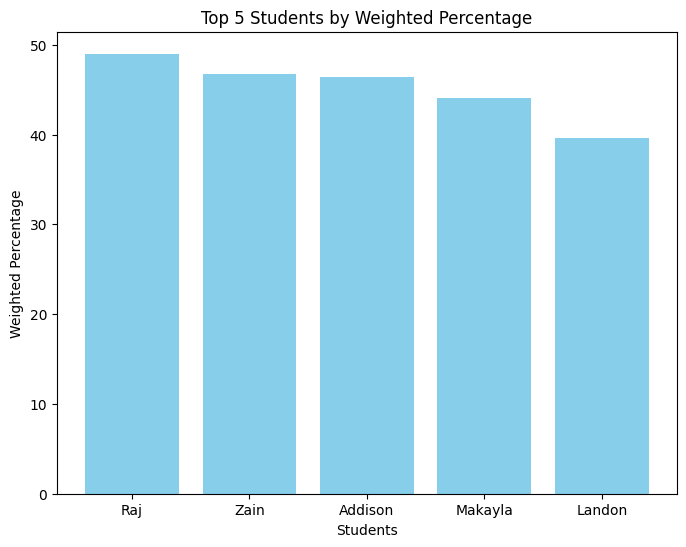

In [ ]:
#16.Create a bar chart displaying weighted percentages for top 5 students.
import matplotlib.pyplot as plt
top_5_students = mergedf.sort_values(by='Weighted Percentage', ascending=False).head(5)

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(top_5_students['Name'], top_5_students['Weighted Percentage'], color='skyblue')
plt.xlabel('Students')
plt.ylabel('Weighted Percentage')
plt.title('Top 5 Students by Weighted Percentage')
plt.show()

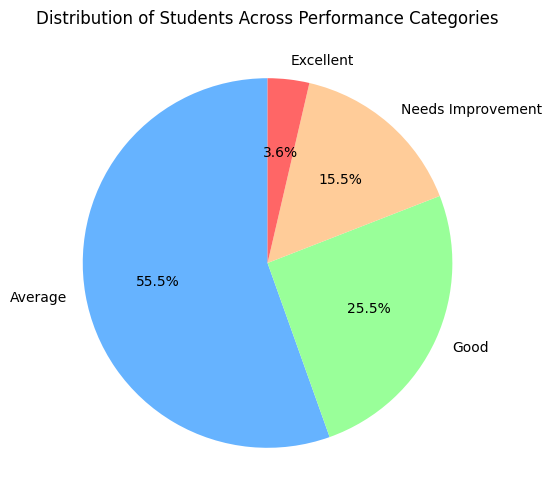

In [ ]:
# 17. Plotting the Pie chart for category distribution
category_counts = mergedf['Category'].value_counts()

plt.figure(figsize=(8, 6))
category_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#99ff99', '#ffcc99', '#ff6666'])
plt.title('Distribution of Students Across Performance Categories')
plt.ylabel('')  # Hide the y-label
plt.show()


<ipython-input-52-704aa4b04598>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Test', y='Score', data=df_melted, palette='coolwarm')


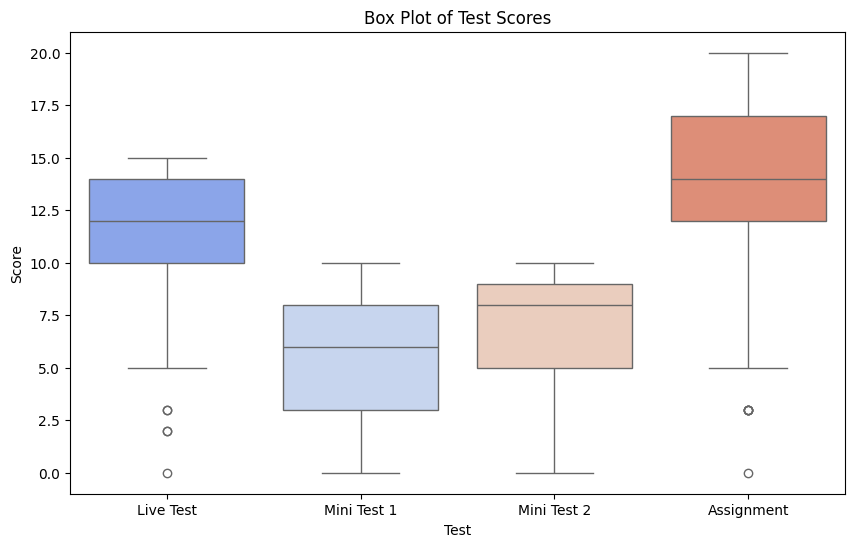

In [ ]:
#18.Create box plots for each test (Live Test, Mini Test 1, Mini Test 2, Assignment) to visualize the spread and detect potential outliers in scores.
import seaborn as sns
df_melted = mergedf.melt(id_vars=["Name"], value_vars=["Live Test", "Mini Test 1", "Mini Test 2", "Assignment"],
                    var_name="Test", value_name="Score")

# Plotting the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Test', y='Score', data=df_melted, palette='coolwarm')
plt.title('Box Plot of Test Scores')
plt.show()

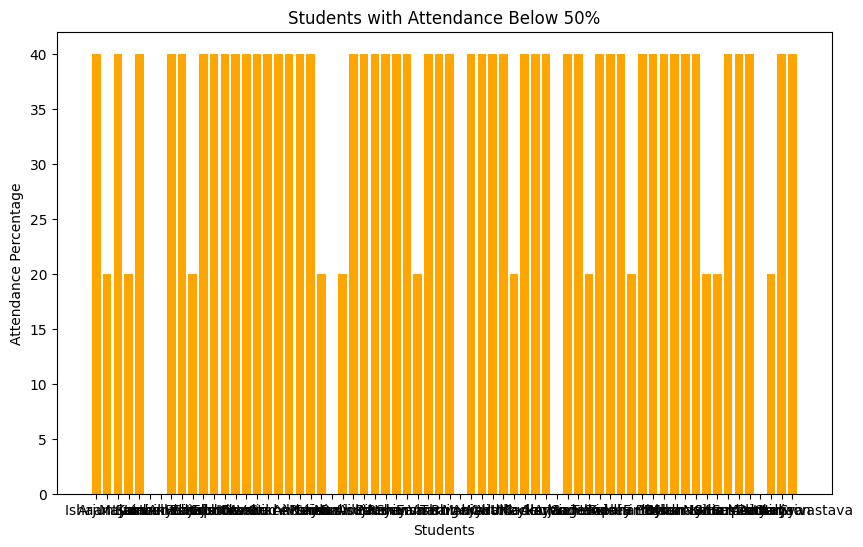

In [ ]:
#19.Create a chart to show the students where attendance is less than 50%.
students_below_50_attendance = mergedf[mergedf['Attendance Percentage'] < 50]

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(students_below_50_attendance['Name'], students_below_50_attendance['Attendance Percentage'], color='orange')
plt.xlabel('Students')
plt.ylabel('Attendance Percentage')
plt.title('Students with Attendance Below 50%')
plt.show()


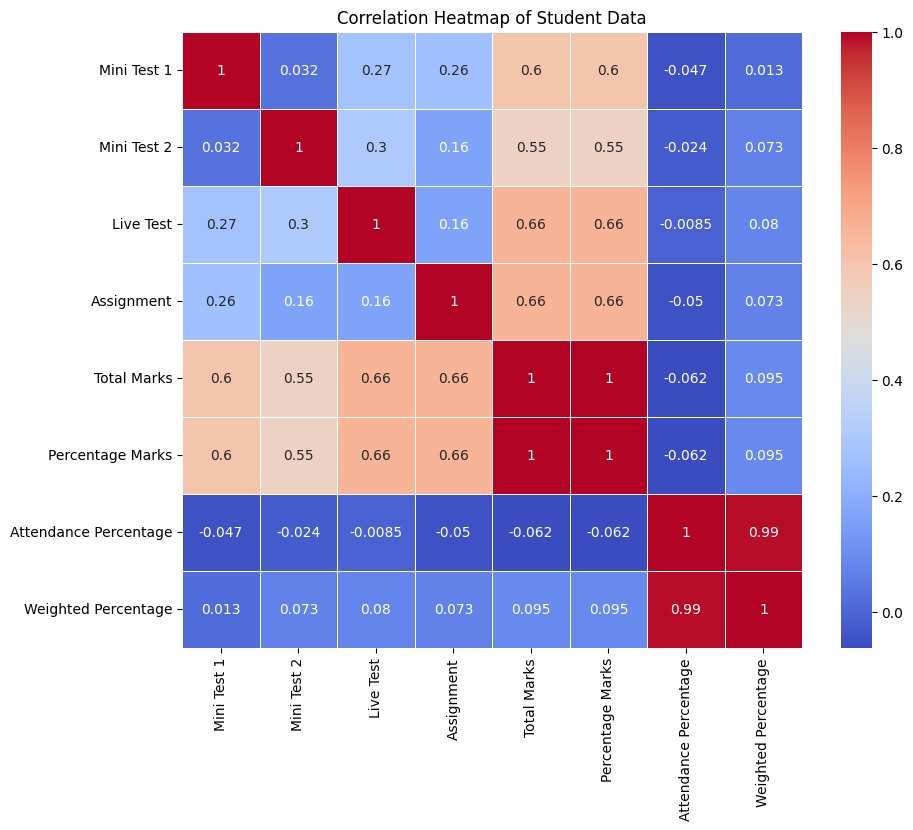

In [ ]:
# 20.5.Any other visualization/analysis which you can infer from data for the management.Compute the correlation matrix heat map
numeric_df = mergedf.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Student Data')
plt.show()